In [1]:
# Librerías Básicas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
# EDA de DF
from ydata_profiling import ProfileReport as pp

# Scikit-Learn
## Preprocesado de Datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

## Metricas
from sklearn import metrics

## Modelado
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model



**Note** The idea of this code is that each section (corresponding to each Model) can be run individually independently of the others, with which several lines of code will be repeated in each section.

# Model performance metrics

The Target variable "Price" has a large range of variation, so metrics that directly reflect the average variations of the estimates with respect to the actual price are not useful for the purposes of the project. An example of this is the Mean Squared Error and the root of it

$$MSE= \frac{1}{N} \sum_i (y_i^{pred}-y_i)^2$$
$$RMSE= \sqrt{\frac{1}{N} \sum_i (y_i^{pred}-y_i)^2}$$


Better metrics are those that quantify the average relative error in the estimate, such as **Average relative error**
$$ MAPE = \frac{1}{N} \sum_i \frac{|y_i^{pred}-y_i|}{y_i}$$
which will be the one we will use

In addition, we will resort to the Pearson Coefficient $R^2$

*Note: All metrics always applied to a Test set*

#### Definition of Score Functions

In [2]:
def scores_models(y_real , y_predicted):
    MSE = metrics.mean_squared_error(y_real, y_predicted)
    RMSE = np.sqrt( metrics.mean_squared_error(y_real, y_predicted) ) 
    MAPE = metrics.mean_absolute_percentage_error(y_real,y_predicted)
    R2score = metrics.r2_score(y_true=y_real,y_pred=y_predicted)
    
    print(f'Score MSE  : {MSE:0.5f}')
    print(f'Score RMSE : {RMSE:0.5f}')
    print(f'Score MAPE : {MAPE:0.2f}')
    print(f'R^2-score  : {R2score:0.5}')

In [3]:
def MAPE_a_mano(y_real , y_predicted):
    metrica_sin_100 = np.sum(np.divide(np.abs(y_real - y_predicted),np.abs(y_real))) / np.size(y_real)
    metrica_con_100 = 100*(np.sum(np.divide(np.abs(y_real - y_predicted),np.abs(y_real))) / np.size(y_real))
    print("MAPE sin 100", metrica_sin_100.values)
    print("MAPE con 100", metrica_con_100.values)

---

# Database Import

In [4]:
df_all = pd.read_excel("../Databases/DB_Modeling.xlsx")
df_all.columns

Index(['idPost', 'Precio', 'm2total', 'm2cubierto', 'Banos', 'Dormitorios',
       'Ambientes', 'Antiguedad', 'Cochera', 'Toilette', 'coordenadas.lat',
       'coordenadas.lng', 'Villa Belgrano', 'Argüello', 'Cerro de las Rosas',
       'URCA', 'Valle Escondido', 'Alta Córdoba', 'Jardín', 'Alto Alberdi',
       'Manantiales', 'Villa Rivera Indarte', 'Greenville II',
       'Villa Warcalde', 'Colón', 'Lomas de la Carolina', 'Centro', 'country',
       'living', 'duplex', 'quincho', 'escritura', 'quinta', 'terraza',
       'escritorio', 'lavadero', 'asador', 'galeria', 'balcon', 'demoler',
       'reciclar', 'oportunidad', 'barrio cerrado', 'pileta_piscina',
       'patio_jardin', 'plantaalta_pa', 'coordenadas', 'en_cordoba'],
      dtype='object')

# Modeled

## Regression Models with Scikit-Learn

### Model 1 - Simple Linear Regression --> Baseline Model

##### With the variables considered most relevant

In [7]:
features_regr = ['m2total', 'm2cubierto', 'Banos', 'Dormitorios', 'Antiguedad',
       'Cochera', 'Toilette', 'Villa Belgrano', 'Argüello',
       'Cerro de las Rosas', 'URCA', 'Valle Escondido', 'barrio cerrado',
       'country', 'living', 'quincho', 'escritura', 'pileta_piscina',
       'patio_jardin', 'demoler','reciclar', 'oportunidad']

target_regr = ['Precio']

In [8]:
#df_modelo = df[target_regr + features_regr]

y = df_all[target_regr]
X = df_all[features_regr]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # uso la semilla para obtener los mismos sets en cada modelo

---

In [11]:
modelo_lineal = linear_model.LinearRegression()
modelo_lineal.fit(X_train, y_train)

LinearRegression()

In [12]:
#scores_models(y_real=y_train,y_predicted=modelo.predict(X_train))
scores_models(y_real=y_test,y_predicted=modelo_lineal.predict(X_test))


Score MSE  : 11511839100.60058
Score RMSE : 107293.23884
Score MAPE : 0.38
R^2-score  : 0.61693


In [13]:
MAPE_a_mano(y_test,y_predicted=modelo_lineal.predict(X_test))

MAPE sin 100 [0.38332639]
MAPE con 100 [38.33263949]


c:\Users\javie\anaconda3\envs\diplodatos\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


##### With optional variables included

In this section it is seen that the other variables do not contribute to the general performance of the model, at least this one, so we will not use them.

In [16]:
features_regr = ['m2total', 'm2cubierto', 'Banos', 'Dormitorios', 'Antiguedad',
       'Cochera', 'Toilette', 'Villa Belgrano', 'Argüello',
       'Cerro de las Rosas', 'URCA', 'Valle Escondido', 'barrio cerrado',
       'country', 'living', 'quincho', 'escritura', 'pileta_piscina',
       'patio_jardin', 'demoler','reciclar', 'oportunidad' , 'plantaalta_pa' , 'duplex' , 'terraza' , 'escritorio' , 'lavadero' , 'asador' , 'galeria' , 'balcon' ]

target_regr = ['Precio']

In [17]:
#df_modelo = df[target_regr + features_regr]

y = df_all[target_regr]
X = df_all[features_regr]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # uso la semilla para obtener los mismos sets en cada modelo

In [19]:
modelo_lineal2 = linear_model.LinearRegression()
modelo_lineal2.fit(X_train, y_train)

LinearRegression()

In [20]:
#scores_models(y_real=y_train,y_predicted=modelo.predict(X_train))
scores_models(y_real=y_test,y_predicted=modelo_lineal2.predict(X_test))


Score MSE  : 11419150485.70246
Score RMSE : 106860.42526
Score MAPE : 0.39
R^2-score  : 0.62002


##### What if the variables are scaled? (main variables only)

In [21]:
features_regr = ['m2total', 'm2cubierto', 'Banos', 'Dormitorios', 'Antiguedad',
       'Cochera', 'Toilette', 'Villa Belgrano', 'Argüello',
       'Cerro de las Rosas', 'URCA', 'Valle Escondido', 'barrio cerrado',
       'country', 'living', 'quincho', 'escritura', 'pileta_piscina',
       'patio_jardin', 'demoler','reciclar', 'oportunidad']

target_regr = ['Precio']

In [22]:
#df_modelo = df[target_regr + features_regr]

y = df_all[target_regr]
X = df_all[features_regr]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # uso la semilla para obtener los mismos sets en cada modelo

In [24]:
# Creación del Pipeline Preprocesado y Modelado 
numeric_cols = ['m2total', 'm2cubierto', 'Banos', 'Dormitorios', 'Antiguedad',
       'Cochera', 'Toilette']

In [25]:
numeric_transformer = Pipeline( steps=[ ('scaler', StandardScaler()) ]  )
preprocessor_X = ColumnTransformer( transformers=[ ('numeric', numeric_transformer, numeric_cols) ],remainder='passthrough')
preprocessor_y = ColumnTransformer( transformers=[ ('numeric', numeric_transformer, ["Precio"]) ])
#preprocessor_X

In [26]:
X_train_prep = preprocessor_X.fit_transform(X_train)
X_test_prep  = preprocessor_X.transform(X_test)
y_train_prep = preprocessor_y.fit_transform(y_train)
y_test_prep  = preprocessor_y.transform(y_test)

In [27]:
# Check Inverse-transform data
y_train_inverse = preprocessor_y.named_transformers_['numeric'].named_steps['scaler'].inverse_transform(y_train_prep)

In [28]:
modelo_lineal3 = Pipeline([('preprocessing', preprocessor_X),('modelo', linear_model.LinearRegression())])
modelo_lineal3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['m2total', 'm2cubierto',
                                                   'Banos', 'Dormitorios',
                                                   'Antiguedad', 'Cochera',
                                                   'Toilette'])])),
                ('modelo', LinearRegression())])

In [29]:
modelo_lineal3.fit(X_train,y_train_prep)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['m2total', 'm2cubierto',
                                                   'Banos', 'Dormitorios',
                                                   'Antiguedad', 'Cochera',
                                                   'Toilette'])])),
                ('modelo', LinearRegression())])

In [30]:
y_test_inverse_predicted = preprocessor_y.named_transformers_['numeric'].named_steps['scaler'].inverse_transform(modelo_lineal3.predict(X_test))

In [31]:
scores_models(y_real=y_test,y_predicted=y_test_inverse_predicted)

Score MSE  : 11511839100.60058
Score RMSE : 107293.23884
Score MAPE : 0.38
R^2-score  : 0.61693


### Model 2 - Polynomial Ridge Regression with GridSearch-CrossValidation Optimization

#### Hyperparameter Optimization

*Remember* Tip from Scikit-learn the split in Training-Test **always** is done first, in particular before any [data preprocessing](https://scikit-learn.org/stable/common_pitfalls.html#:~:text=Always%20split%20the%20data%20into,result%20in%20overly%20optimistic%20scores.)

In [32]:
features_regr = ['m2total', 'm2cubierto', 'Banos', 'Dormitorios', 'Antiguedad',
       'Cochera', 'Toilette', 'Villa Belgrano', 'Argüello',
       'Cerro de las Rosas', 'URCA', 'Valle Escondido', 'barrio cerrado',
       'country', 'living', 'quincho', 'escritura', 'pileta_piscina',
       'patio_jardin', 'demoler','reciclar', 'oportunidad']

target_regr = ['Precio']

In [33]:
#df_modelo = df[target_regr + features_regr]

y = df_all[target_regr]
X = df_all[features_regr]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # uso la semilla para obtener los mismos sets en cada modelo

In [35]:
#Defino pipeline 

alphas = [2**i for i in range(-13,13) ]
parameters = {'polynomialfeatures__degree': range(4), 'ridge__alpha': alphas}


modelo_polinom_ridge=make_pipeline(PolynomialFeatures(), linear_model.Ridge())
GS_modelo_polinom_ridge = GridSearchCV(modelo_polinom_ridge, parameters, scoring = "neg_mean_absolute_percentage_error")



In [36]:
GS_modelo_polinom_ridge.fit(X_train, y_train)

c:\Users\javie\anaconda3\envs\diplodatos\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.21776e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\javie\anaconda3\envs\diplodatos\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.84706e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\javie\anaconda3\envs\diplodatos\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.86526e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\javie\anaconda3\envs\diplodatos\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.63021e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\jav

GridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': range(0, 4),
                         'ridge__alpha': [0.0001220703125, 0.000244140625,
                                          0.00048828125, 0.0009765625,
                                          0.001953125, 0.00390625, 0.0078125,
                                          0.015625, 0.03125, 0.0625, 0.125,
                                          0.25, 0.5, 1, 2, 4, 8, 16, 32, 64,
                                          128, 256, 512, 1024, 2048, 4096]},
             scoring='neg_mean_absolute_percentage_error')

In [37]:
GS_modelo_polinom_ridge.best_params_, GS_modelo_polinom_ridge.best_score_

({'polynomialfeatures__degree': 2, 'ridge__alpha': 64}, -0.3372148512693117)

Opt. degree = 2 . Opt Reg Param :  $\alpha = 64$

In [38]:
#Defino pipeline 

alphas = [64+i for i in range(-20,50) ]
parameters = {'polynomialfeatures__degree': np.array([2]), 'ridge__alpha': alphas}


modelo_polinom_ridge2=make_pipeline(PolynomialFeatures(), linear_model.Ridge())
GS_modelo_polinom_ridge2 = GridSearchCV(modelo_polinom_ridge2, parameters, scoring = "neg_mean_absolute_percentage_error")

In [39]:
GS_modelo_polinom_ridge2.fit(X_train, y_train)

c:\Users\javie\anaconda3\envs\diplodatos\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.00401e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\javie\anaconda3\envs\diplodatos\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.00106e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\javie\anaconda3\envs\diplodatos\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.01549e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\javie\anaconda3\envs\diplodatos\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.99e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


c:\Users\javie\anaconda3\envs\diplodatos\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.2564e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\javie\anaconda3\envs\diplodatos\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.04284e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\javie\anaconda3\envs\diplodatos\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.03648e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\javie\anaconda3\envs\diplodatos\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.05048e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\javi

GridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': array([2]),
                         'ridge__alpha': [44, 45, 46, 47, 48, 49, 50, 51, 52,
                                          53, 54, 55, 56, 57, 58, 59, 60, 61,
                                          62, 63, 64, 65, 66, 67, 68, 69, 70,
                                          71, 72, 73, ...]},
             scoring='neg_mean_absolute_percentage_error')

In [40]:
GS_modelo_polinom_ridge2.best_params_, GS_modelo_polinom_ridge.best_score_

({'polynomialfeatures__degree': 2, 'ridge__alpha': 70}, -0.3372148512693117)

(50.0, 120.0)

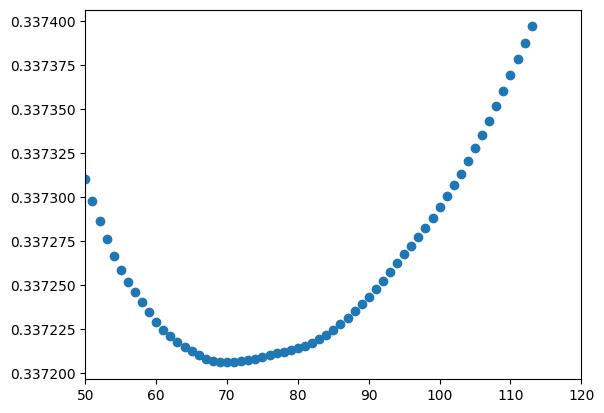

In [41]:
plt.scatter(alphas,-GS_modelo_polinom_ridge2.cv_results_["mean_test_score"])
plt.xlim(50,120)

#### Regression With Optimal Parameters

In [42]:
features_regr = ['m2total', 'm2cubierto', 'Banos', 'Dormitorios', 'Antiguedad',
       'Cochera', 'Toilette', 'Villa Belgrano', 'Argüello',
       'Cerro de las Rosas', 'URCA', 'Valle Escondido', 'barrio cerrado',
       'country', 'living', 'quincho', 'escritura', 'pileta_piscina',
       'patio_jardin', 'demoler','reciclar', 'oportunidad']

target_regr = ['Precio']

In [43]:
#df_modelo = df[target_regr + features_regr]

y = df_all[target_regr]
X = df_all[features_regr]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # uso la semilla para obtener los mismos sets en cada modelo

In [45]:
modelo_opt_polinom_ridge=Pipeline( [  ("transformation_pol",PolynomialFeatures(degree=2)), ("regresor",linear_model.Ridge(alpha=70))])
modelo_opt_polinom_ridge.fit(X_train, y_train)

c:\Users\javie\anaconda3\envs\diplodatos\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.09276e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Pipeline(steps=[('transformation_pol', PolynomialFeatures()),
                ('regresor', Ridge(alpha=70))])

In [46]:
scores_models(y_real=y_train,y_predicted=modelo_opt_polinom_ridge.predict(X_train))

Score MSE  : 5744081661.46939
Score RMSE : 75789.72003
Score MAPE : 0.32
R^2-score  : 0.82804


In [47]:
scores_models(y_real=y_test,y_predicted=modelo_opt_polinom_ridge.predict(X_test))

Score MSE  : 10956660935.32864
Score RMSE : 104674.07002
Score MAPE : 0.35
R^2-score  : 0.63541


Precio    2408.75604
dtype: float64


(-500000.0, 500000.0)

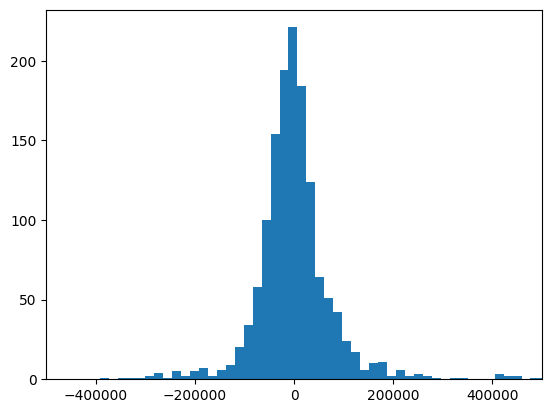

In [48]:
# Histograma del Error
Residuos=y_test - modelo_opt_polinom_ridge.predict(X_test)
print(Residuos.mean())
fig,ax= plt.subplots()
ax.hist(Residuos,bins=150)
ax.set_xlim(-0.5e6,0.5e6)

c:\Users\javie\anaconda3\envs\diplodatos\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


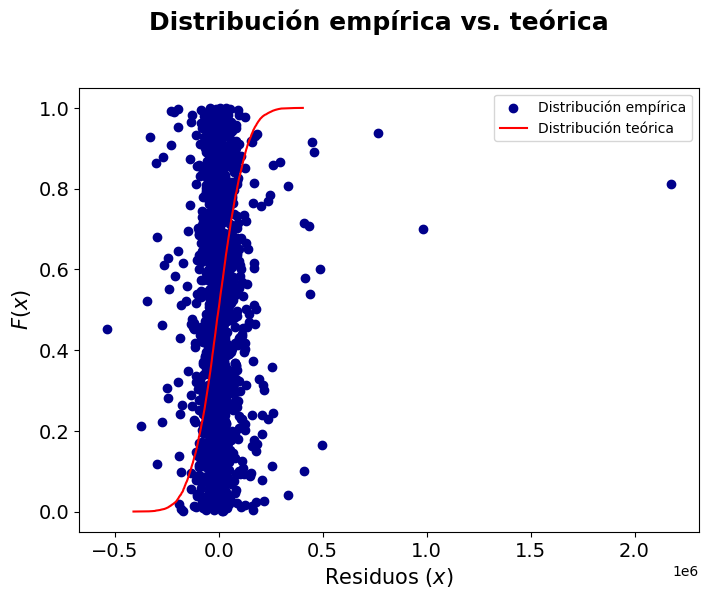

In [49]:
# Armamos la función de distribución observada de nuestros residuos para analizar su normalidad
x = np.sort(Residuos)              # ordenamos los residuos
n = x.size                         # tamaño total de la muestra
y = np.arange(1, n+1) / n          # calculamos las probabilidades acumuladas por cada valor observado en orden

# Luego obtenemos la función de distribución teórica de una normal
Residuos_teoricos = np.random.normal(loc = np.mean(Residuos),   # obtenemos una muestra aleatoria proveniente de una
                    scale = np.std(Residuos), size = 10000)     # distribución normal con la media y desv.est. de nuestros residuos
x_teor = np.sort(Residuos_teoricos)       # ordenamos la muestra aleatoria
n_teor = x_teor.size                      # guardamos el tamaño de esta muestra
y_teor = np.arange(1, n_teor+1) / n_teor  # calculamos las probabilidades acumuladas por sus valores

# Por último, superponemos ambas distribuciones en un mismo gráfico
fig, ax = plt.subplots(figsize = (8,6))
fig.suptitle("Distribución empírica vs. teórica", fontsize = 18, fontweight = "bold")
ax.scatter(x, y, color = "darkblue", label = "Distribución empírica")
ax.plot(x_teor, y_teor, color = "red", label = "Distribución teórica")
ax.set_xlabel("Residuos ($x$)", fontsize = 15)
ax.set_ylabel("$F(x)$", fontsize = 15)
ax.tick_params(labelsize = 14)
ax.legend()
plt.subplots_adjust(top = 0.85)
plt.show()

### Model 3 - Neural Network (Scikit learn)

In [50]:
features_regr = ['m2total', 'm2cubierto', 'Banos', 'Dormitorios', 'Antiguedad',
       'Cochera', 'Toilette', 'Villa Belgrano', 'Argüello',
       'Cerro de las Rosas', 'URCA', 'Valle Escondido', 'barrio cerrado',
       'country', 'living', 'quincho', 'escritura', 'pileta_piscina',
       'patio_jardin', 'demoler','reciclar', 'oportunidad']
print("Numero de Features =",len(features_regr))

target_regr = ['Precio']

Numero de Features = 22


In [51]:
y = df_all[target_regr]
X = df_all[features_regr]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # uso la semilla 2 para obtener los mismos sets en cada modelo

In [52]:
# Modelado
# ==============================================================================
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Creación del Pipeline Preprocesado y Modelado 
numeric_cols = ['m2total', 'm2cubierto', 'Banos', 'Dormitorios', 'Antiguedad',
       'Cochera', 'Toilette']

In [54]:
numeric_transformer = Pipeline( steps=[ ('scaler', StandardScaler()) ]  )
preprocessor_X = ColumnTransformer( transformers=[ ('numeric', numeric_transformer, numeric_cols) ],remainder='passthrough')
preprocessor_y = ColumnTransformer( transformers=[ ('numeric', numeric_transformer, ["Precio"]) ])
#preprocessor_X

In [55]:
X_train_prep = preprocessor_X.fit_transform(X_train)
X_test_prep  = preprocessor_X.transform(X_test)
y_train_prep = preprocessor_y.fit_transform(y_train)
y_test_prep  = preprocessor_y.transform(y_test)

In [56]:
# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor_X),
                 ('modelo', MLPRegressor(solver = 'lbfgs', max_iter= 1000))])

In [57]:
pipe.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['m2total', 'm2cubierto', 'Banos',
                                     'Dormitorios', 'Antiguedad', 'Cochera',
                                     'Toilette'])])),
  ('modelo', MLPRegressor(max_iter=1000, solver='lbfgs'))],
 'verbose': False,
 'preprocessing': ColumnTransformer(remainder='passthrough',
                   transformers=[('numeric',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  ['m2total', 'm2cubierto', 'Banos',
                                   'Dormitorios', 'Antiguedad', 'Cochera',
                                   'Toilette'])]),
 'modelo': MLPRegressor(max_iter=1000, solver='lbfgs'),
 'preprocessing__n_jobs': None,
 'preprocessing__remainde

In [58]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================

alphas = [2**i for i in range(-4,10) ]
param_distributions = {
    #'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__hidden_layer_sizes': [(1),(2),(2,2),(5),(5,5),(10), (20), (10, 10),(21),(21,21)],
    'modelo__alpha':np.array(alphas),
    'modelo__learning_rate_init': [0.0001,0.001, 0.01],
    'modelo__max_iter': [3000]
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train_prep)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_modelo__max_iter,param_modelo__learning_rate_init,param_modelo__hidden_layer_sizes,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
35,3000,0.001,"(5, 5)",8.0,-0.203686,0.020925,-0.158911,0.006753
40,3000,0.001,10,4.0,-0.206428,0.021915,-0.156249,0.008277
23,3000,0.0001,"(5, 5)",0.125,-0.206968,0.029184,-0.164582,0.012959
32,3000,0.001,5,32.0,-0.214487,0.028135,-0.190513,0.006084
18,3000,0.0001,"(5, 5)",0.25,-0.216128,0.028991,-0.159405,0.006500
25,3000,0.0001,10,32.0,-0.221762,0.033025,-0.182899,0.002775
16,3000,0.001,21,32.0,-0.223033,0.038546,-0.176302,0.003904
29,3000,0.0001,5,0.0625,-0.224202,0.030195,-0.163280,0.014888
10,3000,0.01,10,32.0,-0.225615,0.040262,-0.182639,0.003179
19,3000,0.001,20,32.0,-0.226631,0.045568,-0.175944,0.002378


In [59]:
modelo_RedNeu_opt = grid.best_estimator_

In [60]:
modelo_RedNeu_opt['modelo'].get_params()

{'activation': 'relu',
 'alpha': 8.0,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (5, 5),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 3000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [61]:
modelo_RedNeu_opt.predict(X_test).shape

(1392,)

In [62]:
y_train_inverse_predicted = preprocessor_y.named_transformers_['numeric'].named_steps['scaler'].inverse_transform(modelo_RedNeu_opt.predict(X_train).reshape(-1,1))

y_test_inverse_predicted = preprocessor_y.named_transformers_['numeric'].named_steps['scaler'].inverse_transform(modelo_RedNeu_opt.predict(X_test).reshape(-1,1))

In [63]:
scores_models(y_real=y_train,y_predicted=y_train_inverse_predicted)

Score MSE  : 5845984756.20598
Score RMSE : 76459.03973
Score MAPE : 0.31
R^2-score  : 0.82499


In [64]:
scores_models(y_real=y_test,y_predicted=y_test_inverse_predicted)

Score MSE  : 10140637230.98483
Score RMSE : 100700.73104
Score MAPE : 0.33
R^2-score  : 0.66256
